# Загрузка файла

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
figsize=(20, 15)

In [2]:
path = "benchmarks.csv"

In [3]:
df = pd.read_csv(
    path,
    delimiter=r",")

In [4]:
df.head()

,id,name,cost,scale,percent_write,pool_enabled,count_connections,cache_enabled,base_in_cache,tps,initial_connection_time,latency_avg,latency_std
0,91,../results/cache_high/91.txt,5000,300,5,1,200,1,0,3957.608948,1662.348,50.529,53.033
1,56,../results/cache_high/56.txt,0,300,25,1,300,1,0,7410.819271,2320.749,40.475,28.797
2,95,../results/cache_high/95.txt,5000,300,0,1,200,1,0,2014.498079,1560.837,99.270,61.322
3,83,../results/cache_high/83.txt,5000,300,50,1,200,1,0,8326.162613,1728.101,24.015,13.597
4,88,../results/cache_high/88.txt,5000,300,25,1,300,1,0,2463.887750,2074.608,121.646,149.489


# Анализ данных

## Просмотр и замена 400 коннектов на 300

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       288 non-null    int64  
 1   name                     288 non-null    object 
 2   cost                     288 non-null    int64  
 3   scale                    288 non-null    int64  
 4   percent_write            288 non-null    int64  
 5   pool_enabled             288 non-null    int64  
 6   count_connections        288 non-null    int64  
 7   cache_enabled            288 non-null    int64  
 8   base_in_cache            288 non-null    int64  
 9   tps                      288 non-null    float64
 10  initial_connection_time  288 non-null    float64
 11  latency_avg              288 non-null    float64
 12  latency_std              288 non-null    float64
dtypes: float64(4), int64(8), object(1)
memory usage: 29.4+ KB


In [6]:
df.describe()

,id,cost,scale,percent_write,pool_enabled,count_connections,cache_enabled,base_in_cache,tps,initial_connection_time,latency_avg,latency_std
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.00000,288.000000,288.000000,288.000000,288.000000
mean,225.770833,2000.000000,170.000000,20.000000,0.666667,163.541667,0.333333,0.50000,7211.496139,1892.462951,29.424264,28.324972
std,111.299340,2164.007123,130.226284,19.719284,0.472225,98.192506,0.472225,0.50087,3173.479670,1622.020318,34.760777,54.845688
min,21.000000,0.000000,40.000000,0.000000,0.000000,50.000000,0.000000,0.00000,1019.225322,257.979000,3.120000,0.888000
25%,154.750000,0.000000,40.000000,3.750000,0.000000,87.500000,0.000000,0.00000,5008.747236,789.198000,12.049500,6.790000
50%,239.500000,1000.000000,170.000000,15.000000,1.000000,150.000000,0.000000,0.50000,7361.520214,1459.024500,21.086000,12.506000
75%,324.250000,5000.000000,300.000000,31.250000,1.000000,225.000000,1.000000,1.00000,9031.665231,2070.204750,31.395750,24.715250
max,396.000000,5000.000000,300.000000,50.000000,1.000000,400.000000,1.000000,1.00000,16151.522722,8015.758000,293.830000,577.504000


In [7]:
df.loc[df.count_connections == 400]

,id,name,cost,scale,percent_write,pool_enabled,count_connections,cache_enabled,base_in_cache,tps,initial_connection_time,latency_avg,latency_std
209,38,../results/no_cache_low/8.txt,0,40,25,0,400,0,1,13024.498727,7996.572,30.649,32.752
220,34,../results/no_cache_low/4.txt,0,40,50,0,400,0,1,12499.244419,8015.758,31.962,34.952
280,312,../results/no_cache_low/12.txt,0,40,5,0,400,0,1,13211.430803,7983.630,30.230,28.101


**Заменю значение 400 на 300**

In [8]:
df.loc[df.count_connections == 400, 'count_connections'] = 300 

In [9]:
 df.loc[df.count_connections == 400].count()

id                         0
name                       0
cost                       0
scale                      0
percent_write              0
pool_enabled               0
count_connections          0
cache_enabled              0
base_in_cache              0
tps                        0
initial_connection_time    0
latency_avg                0
latency_std                0
dtype: int64

## Корреляционный анализ

In [10]:
heat_data = df.loc[:, [
    'cost',
    'scale',
    'percent_write',
    'count_connections',
    'tps'
]].copy()

In [11]:
heat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cost               288 non-null    int64  
 1   scale              288 non-null    int64  
 2   percent_write      288 non-null    int64  
 3   count_connections  288 non-null    int64  
 4   tps                288 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 11.4 KB


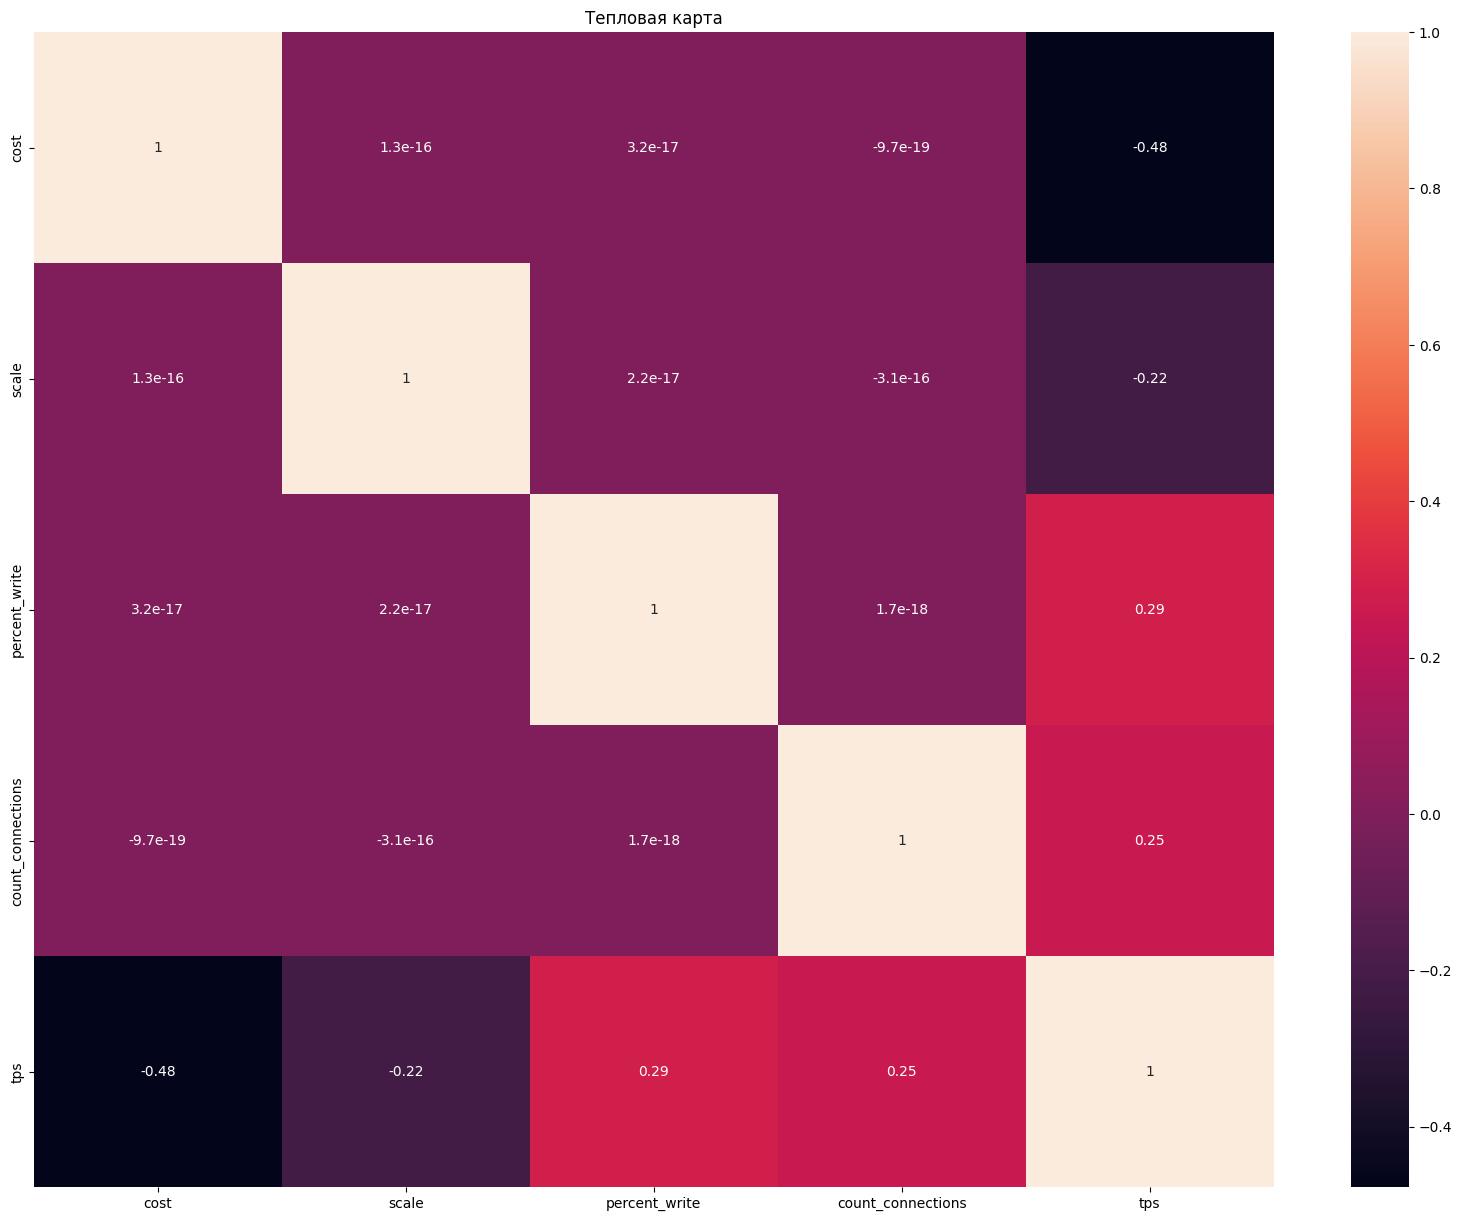

In [12]:
plt.figure(figsize=figsize)
sns.heatmap(heat_data.corr(), annot=True)
plt.title('Тепловая карта')
plt.show()

In [13]:
from scipy.stats import pearsonr, spearmanr

In [14]:
P, p_value_P = pearsonr(heat_data['cost'], heat_data['tps'])
S, p_value_S = spearmanr(heat_data['cost'], heat_data['tps'])
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: -0.47740484554038093 p_value: 8.425655133751233e-18
Spearman correlation: -0.5044508907525077 p_value: 5.3542815720247073e-20


In [15]:
P, p_value_P = pearsonr(heat_data['tps'], heat_data['scale'])
S, p_value_S = spearmanr(heat_data['tps'], heat_data['scale'])
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: -0.21588358052778084 p_value: 0.00022306287583219288
Spearman correlation: -0.211078258853609 p_value: 0.00030944196538336036


In [16]:
P, p_value_P = pearsonr(heat_data['tps'], heat_data['percent_write'])
S, p_value_S = spearmanr(heat_data['tps'], heat_data['percent_write'])
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.2876130202965474 p_value: 6.869041705733503e-07
Spearman correlation: 0.3019062509261565 p_value: 1.7544789778353072e-07


In [17]:
P, p_value_P = pearsonr(heat_data['tps'], heat_data['count_connections'])
S, p_value_S = spearmanr(heat_data['tps'], heat_data['count_connections'])
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.25104541222921994 p_value: 1.6245051154168193e-05
Spearman correlation: 0.32715849364158367 p_value: 1.3071373289548919e-08


**Никакой корреляции не наблюдается**

Разве что tps-scale p-value не такое маленькое, как у остальных, значит, тут ещё можно уловить закономерность в тестах.

Дубликатов в данных нет, пустых тоже, значит этот этап обработки пропускаю

## Проверка возможности кластеризации

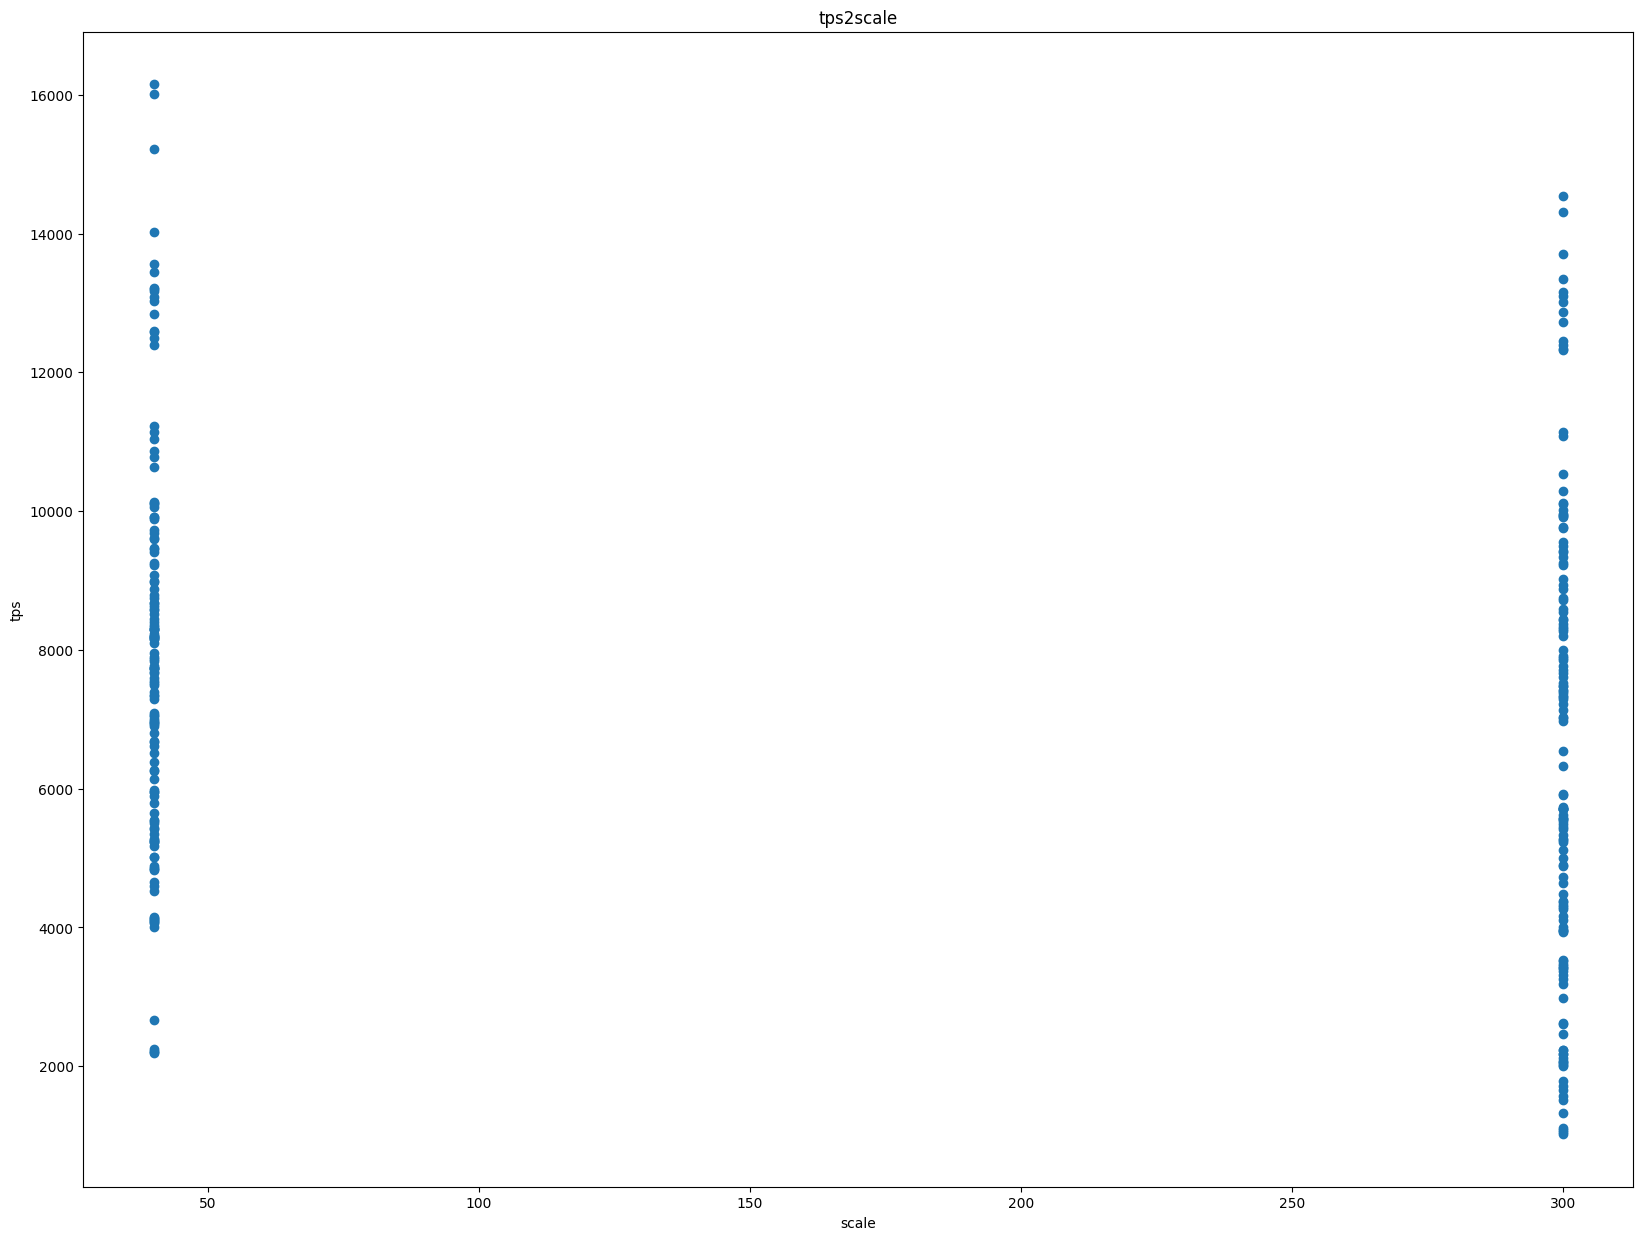

In [18]:
plt.figure(figsize=figsize)
plt.scatter(heat_data.scale, heat_data.tps)
plt.title("tps2scale")
plt.xlabel('scale')
plt.ylabel('tps')
plt.show()

видно, что на меньшем scale база работает лучше.
Нужно было бы больше тестов, чтобы понять есть ли корреляция между этими показателями,
а если её нет - то можно заменить признаком помещается ли в бд база или нет. 

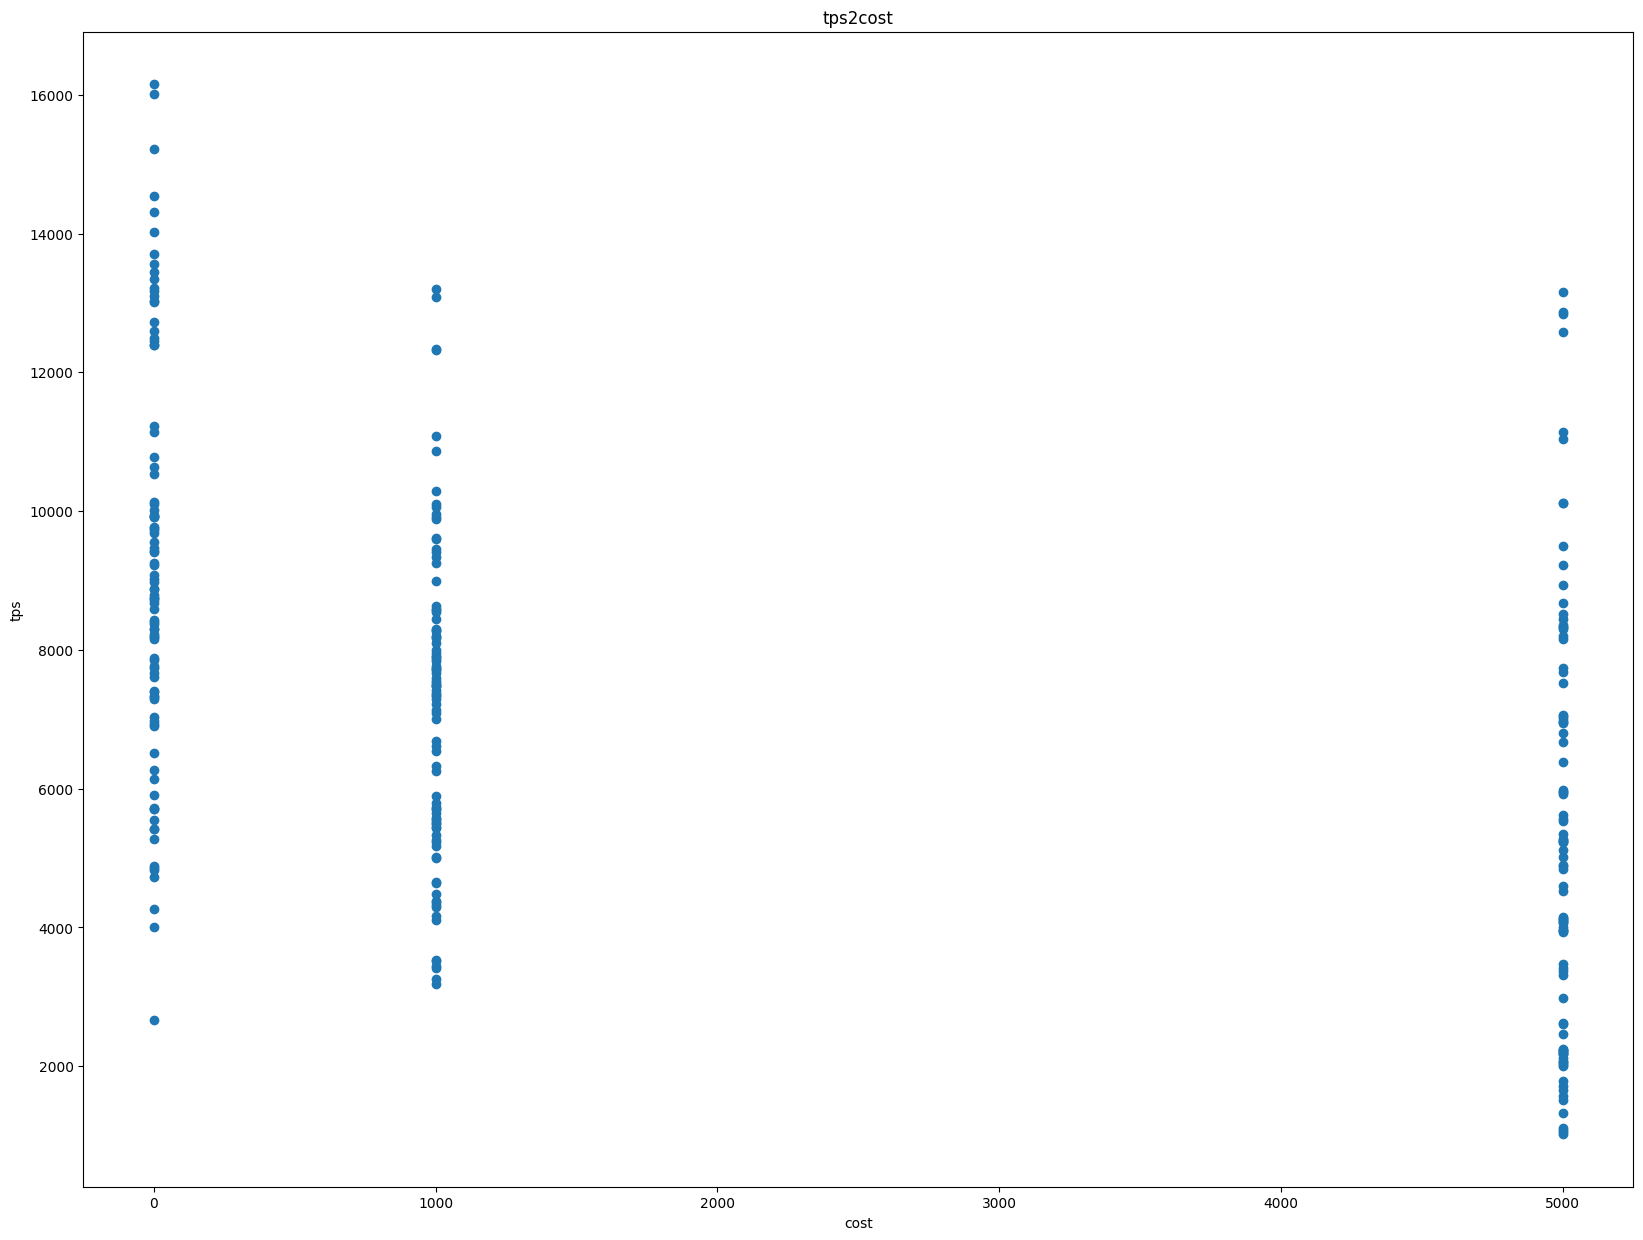

In [19]:
plt.figure(figsize=figsize)
plt.scatter(heat_data.cost, heat_data.tps)
plt.title("tps2cost")
plt.xlabel('cost')
plt.ylabel('tps')
plt.show()

на корреляции ничего не видно, но тут можно угадать кластеры.

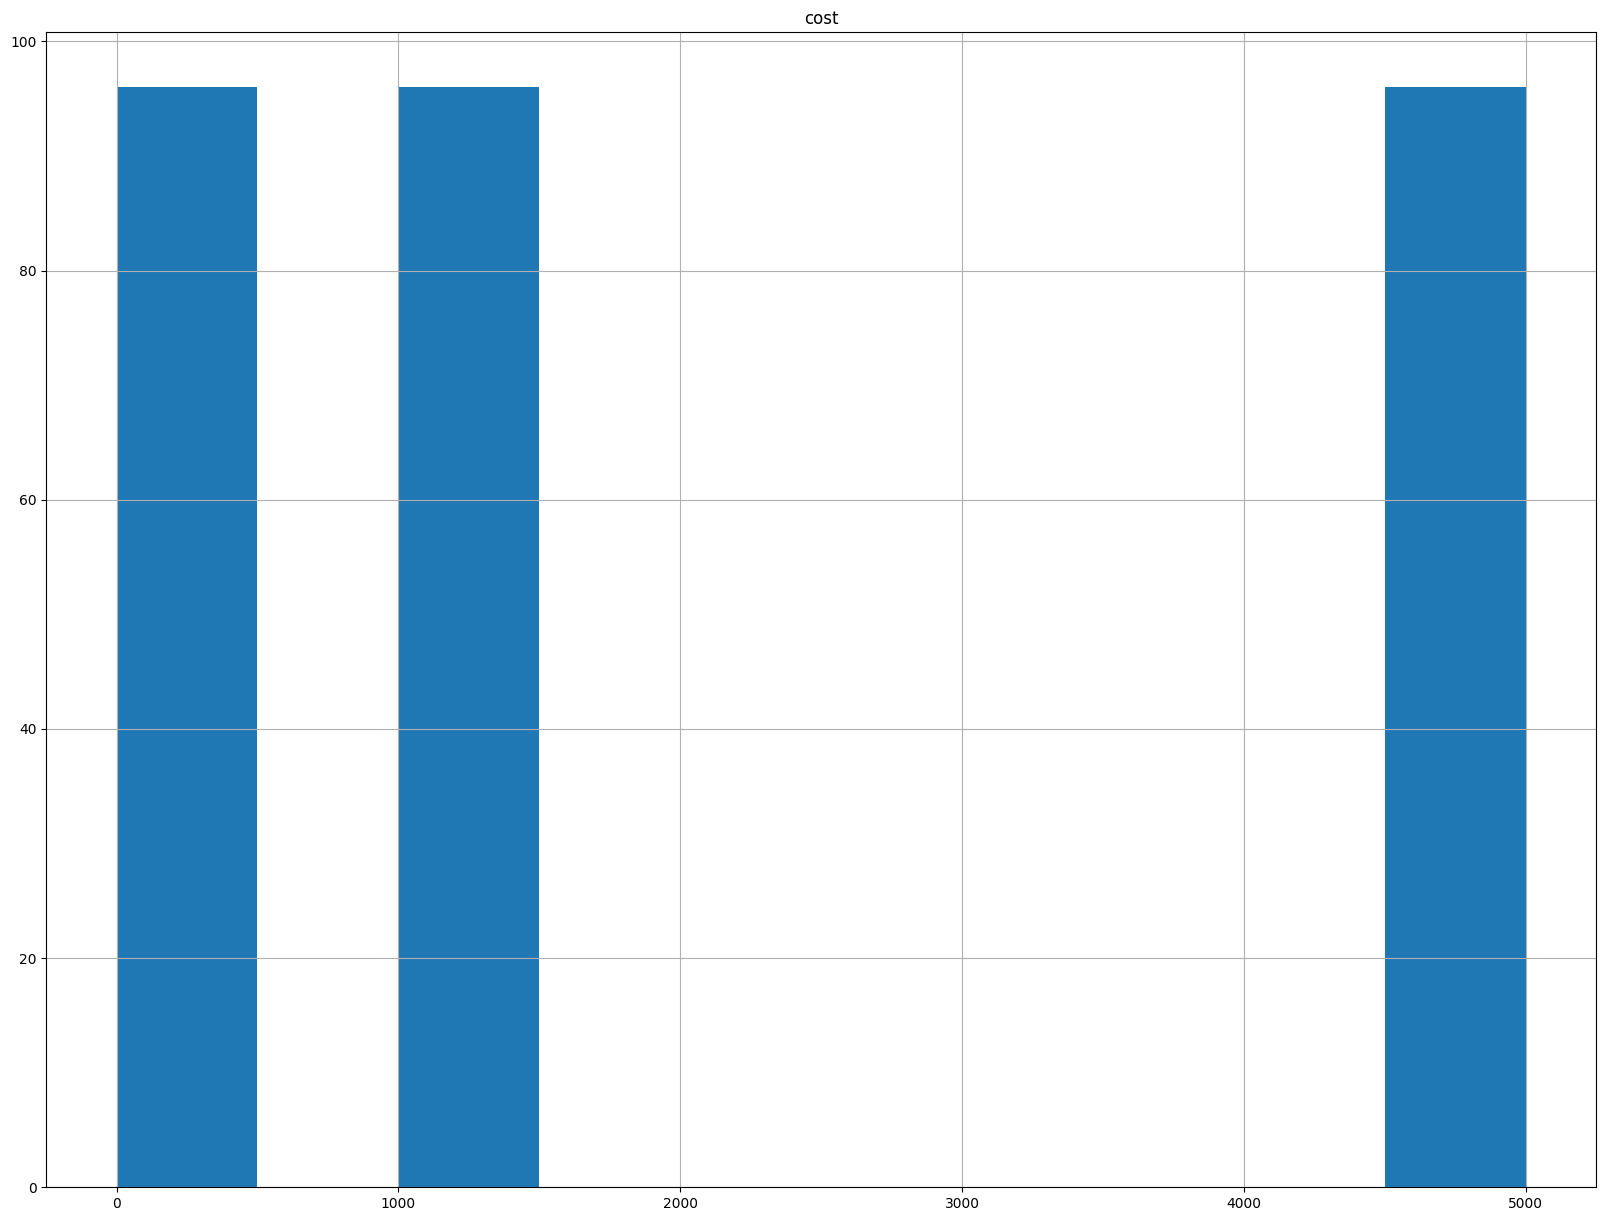

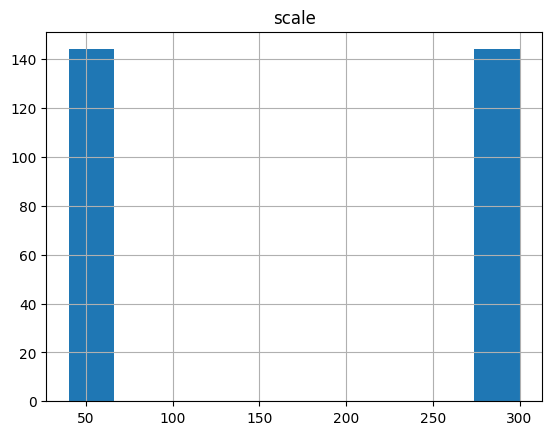

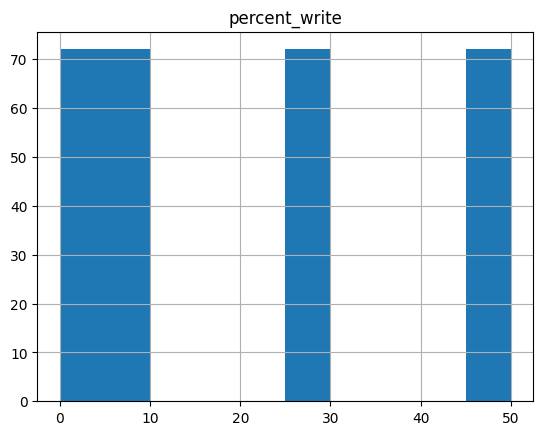

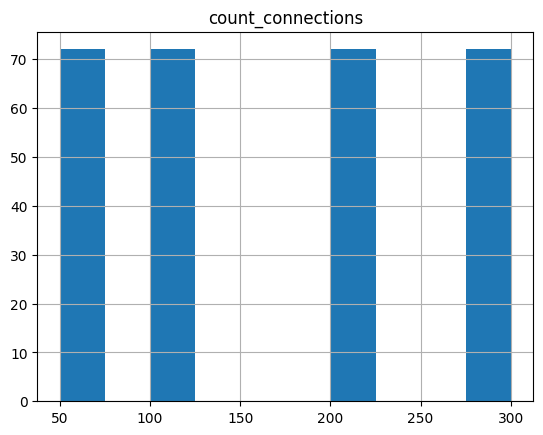

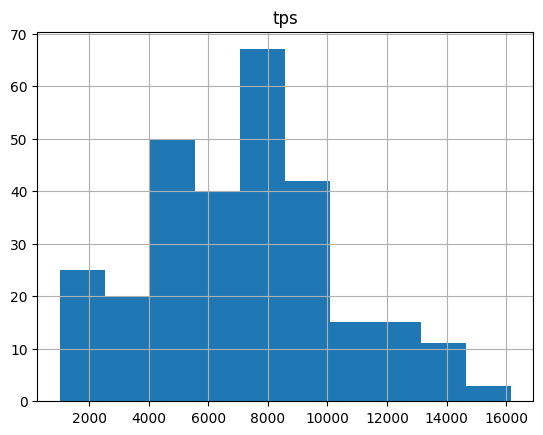

In [20]:
plt.figure(figsize=figsize)
for feature in heat_data.columns:
    if feature !='ID':
        df[feature].hist()
        plt.title(feature)
        plt.show()

Хочется решить задачу регрессии или классификации, однако у меня нет точного признака хорошести или удачности.
Можно попытаться решить кластеризацию, однако мне кажется, тут не будет отдельных классов, а если и будут, то кривые какие-нибудь.
Теоретически с разными параметрами можно добиться произвольной производительности.
Как тогда решать ставить ли pgpool или нет?

In [21]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       288 non-null    int64  
 1   name                     288 non-null    object 
 2   cost                     288 non-null    int64  
 3   scale                    288 non-null    int64  
 4   percent_write            288 non-null    int64  
 5   pool_enabled             288 non-null    int64  
 6   count_connections        288 non-null    int64  
 7   cache_enabled            288 non-null    int64  
 8   base_in_cache            288 non-null    int64  
 9   tps                      288 non-null    float64
 10  initial_connection_time  288 non-null    float64
 11  latency_avg              288 non-null    float64
 12  latency_std              288 non-null    float64
dtypes: float64(4), int64(8), object(1)
memory usage: 29.4+ KB


In [22]:
claster_df = df.drop([
    'id',
    'name',
    'initial_connection_time',
    'latency_avg',
    'latency_std',
], axis=1)

In [23]:
df.groupby(['cache_enabled']).count()

,id,name,cost,scale,percent_write,pool_enabled,count_connections,base_in_cache,tps,initial_connection_time,latency_avg,latency_std
cache_enabled,,,,,,,,,,,,
0,192,192,192,192,192,192,192,192,192,192,192,192
1,96,96,96,96,96,96,96,96,96,96,96,96


In [24]:
from sklearn.manifold import TSNE

# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

# Обучаем модель
transformed = model.fit_transform(claster_df)

In [25]:
claster_df['big_tps'] = (claster_df['tps']>=11000).astype(int)
claster_df.describe()

,cost,scale,percent_write,pool_enabled,count_connections,cache_enabled,base_in_cache,tps,big_tps
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.00000,288.000000,288.000000
mean,2000.000000,170.000000,20.000000,0.666667,162.500000,0.333333,0.50000,7211.496139,0.118056
std,2164.007123,130.226284,19.719284,0.472225,96.181449,0.472225,0.50087,3173.479670,0.323236
min,0.000000,40.000000,0.000000,0.000000,50.000000,0.000000,0.00000,1019.225322,0.000000
25%,0.000000,40.000000,3.750000,0.000000,87.500000,0.000000,0.00000,5008.747236,0.000000
50%,1000.000000,170.000000,15.000000,1.000000,150.000000,0.000000,0.50000,7361.520214,0.000000
75%,5000.000000,300.000000,31.250000,1.000000,225.000000,1.000000,1.00000,9031.665231,0.000000
max,5000.000000,300.000000,50.000000,1.000000,300.000000,1.000000,1.00000,16151.522722,1.000000


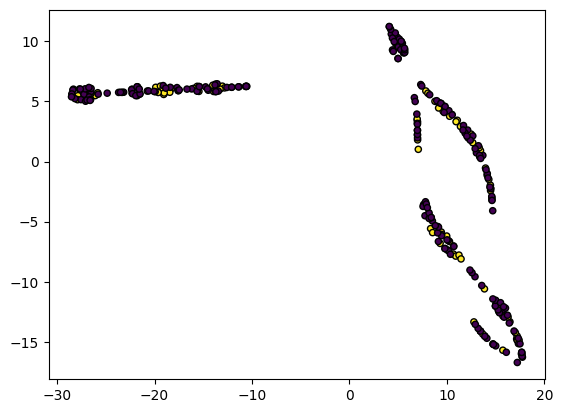

In [26]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

#почему-то необходимо передавать название колонки в кавычках, а не через точку
plt.scatter(x_axis, y_axis, c=claster_df['cache_enabled'], s=20, edgecolor="k")
plt.show()

Похоже кластеры появляются не зависимо от битов моих.Хм, может быть что-то да получится.
А может это просто обманка

## Добавление признака "успешность установки pgpool"

In [38]:
#функция для получения id теста из его конфигурации
def get_test_id(df):
    return str(df['cost'])+str(df['scale'])+str(df['percent_write'])+str(df['count_connections'])+str(df['base_in_cache'])

In [39]:
df_add = df.copy()

In [40]:
df_add['test_id'] = df_add.apply(get_test_id, axis = 1)

In [42]:
df_add.head()

,id,name,cost,scale,percent_write,pool_enabled,count_connections,cache_enabled,base_in_cache,tps,initial_connection_time,latency_avg,latency_std,test_id
0,91,../results/cache_high/91.txt,5000,300,5,1,200,1,0,3957.608948,1662.348,50.529,53.033,500030052000
1,56,../results/cache_high/56.txt,0,300,25,1,300,1,0,7410.819271,2320.749,40.475,28.797,0300253000
2,95,../results/cache_high/95.txt,5000,300,0,1,200,1,0,2014.498079,1560.837,99.270,61.322,500030002000
3,83,../results/cache_high/83.txt,5000,300,50,1,200,1,0,8326.162613,1728.101,24.015,13.597,5000300502000
4,88,../results/cache_high/88.txt,5000,300,25,1,300,1,0,2463.887750,2074.608,121.646,149.489,5000300253000


In [43]:
pool_groups = df_add.groupby(['pool_enabled'])

In [44]:
#делю на тесты с включённым и выключенным pgpool
df_pool_disable = pool_groups.get_group((list(pool_groups.groups)[0]))
df_pool_enable = pool_groups.get_group((list(pool_groups.groups)[1]))

In [45]:
cache_groups = df_pool_enable.groupby(['cache_enabled'])

In [46]:
#делю тесты с включённым pgpool на тесты по кэшу включённому
df_cache_disable = cache_groups.get_group((list(cache_groups.groups)[0]))
df_cache_enable = cache_groups.get_group((list(cache_groups.groups)[1]))

In [47]:
#получу только id теста и результат в tps для тестов без pgpool
crop_df_pool_disable = df_pool_disable.loc[:, [
    'test_id',
    'tps'
]].copy()

In [48]:
crop_df_pool_disable.rename({'tps': 'no_pool_tps'}, axis=1, inplace=True)

**Выполню мёрджинг результатов без pgpool и с ним**

In [49]:
df_cache_disable_compare = df_cache_disable.merge(crop_df_pool_disable, how='left', left_on='test_id', right_on='test_id')
df_cache_enable_compare = df_cache_enable.merge(crop_df_pool_disable, how='left', left_on='test_id', right_on='test_id')

In [51]:
#функция для получения id теста из его конфигурации
def compute_effective(df):
    if df['tps'] >= df['no_pool_tps']:
        return 1
    else:
        return 0

In [52]:
df_cache_disable_compare['pool_effective'] = df_cache_disable_compare.apply(compute_effective, axis = 1)
df_cache_enable_compare['pool_effective'] = df_cache_enable_compare.apply(compute_effective, axis = 1)

In [59]:
df_compared = pd.concat([df_cache_disable_compare, df_cache_enable_compare], ignore_index=True)

In [63]:
df_compared.groupby(['pool_effective']).count()

,id,name,cost,scale,percent_write,pool_enabled,count_connections,cache_enabled,base_in_cache,tps,initial_connection_time,latency_avg,latency_std,test_id,no_pool_tps
pool_effective,,,,,,,,,,,,,,,
0,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117
1,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75


## Деление на обучение, тест
Хотя для малого количества данных делать это кажется бессмысленно

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize

In [64]:
stage_drop_clas = df_compared.drop([
    'id',
    'name',
    'tps',
    'initial_connection_time',
    'latency_avg',
    'latency_std',
    'test_id',
    'no_pool_tps'
], axis=1)

In [67]:
X = stage_drop_clas.drop('pool_effective', axis=1)
y = stage_drop_clas['pool_effective']

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   cost               192 non-null    int64
 1   scale              192 non-null    int64
 2   percent_write      192 non-null    int64
 3   pool_enabled       192 non-null    int64
 4   count_connections  192 non-null    int64
 5   cache_enabled      192 non-null    int64
 6   base_in_cache      192 non-null    int64
dtypes: int64(7)
memory usage: 10.6 KB


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

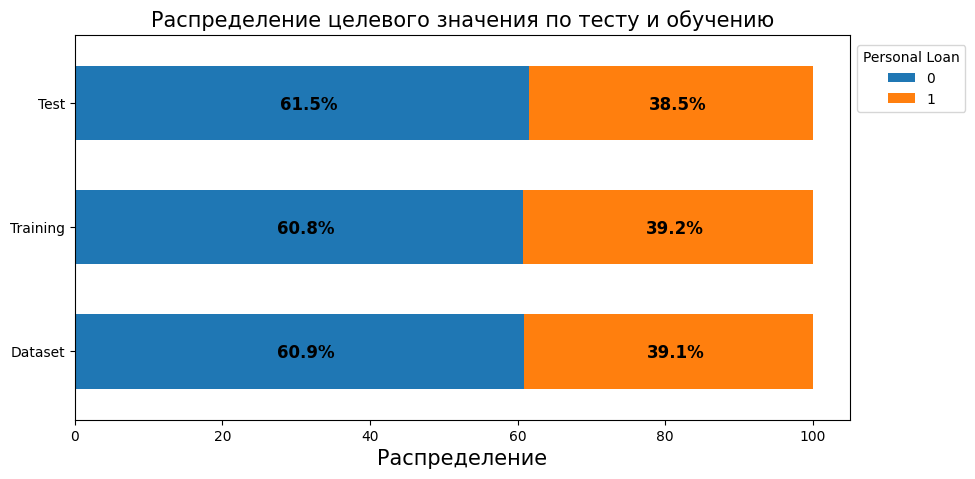

In [71]:
# Define a dataframe containing frequency percentages
df_perc = pd.concat([y.value_counts(normalize=True).mul(100).round(1),
                     y_train.value_counts(normalize=True).mul(100).round(1),
                     y_test.value_counts(normalize=True).mul(100).round(1)], axis=1)
df_perc.columns=['Dataset','Training','Test']
df_perc = df_perc.T

# Plot frequency percentages barplot
df_perc.plot(kind='barh', stacked=True, figsize=(10,5), width=0.6)

# Add the percentages to our plot
for idx, val in enumerate([*df_perc.index.values]):
    for (percentage, y_location) in zip(df_perc.loc[val], df_perc.loc[val].cumsum()):
        plt.text(x=(y_location - percentage) + (percentage / 2)-3,
                 y=idx - 0.05,
                 s=f'{percentage}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.legend(title='Personal Loan', loc=(1.01,0.8))
plt.xlabel('Распределение', fontsize=15)
plt.title('Распределение целевого значения по тесту и обучению', fontsize=15)
plt.show()        

**Не сказать что классы сбалансированны. Данная модель должна точно предсказывать сценарий, в котором pgpool
окажется не эффективен, надо это для того, чтобы не тратить ресурсы и время на точно невыгодные сценарии.**

In [93]:
DTC = DecisionTreeClassifier()

DTC_grid = GridSearchCV(DTC, {'max_depth': list(range(1, 5)), 'max_features': list(range(1, 7))})
DTC_grid.fit(X_train, y_train)

best_depth = DTC_grid.best_estimator_.max_depth # Находим лучшую глубину
best_features = DTC_grid.best_estimator_.max_features # Находим лучшее количество признаков, которые следует учитывать при поиске

DTC = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
DTC.fit(X_train, y_train)

accuracy_score_DTC = np.mean(y_test.values.ravel() == DTC.predict(X_test))
print("Accuracy of DTC model:",  accuracy_score_DTC)
print("Best accuracy:", DTC_grid.best_score_)

Accuracy of DTC model: 0.8461538461538461
Best accuracy: 0.8754838709677418


In [86]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [87]:
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
royalblue_r = royalblue.reversed()

# Функция оценки качества классификатора
def evaluate_clf(clf, X_train, X_test, y_train, y_test, model_name):
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1, 2]})
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Plot PR curve for test data and display AUC score
    knn_precision, knn_recall, _ = precision_recall_curve(y_test, y_pred_test)
    knn_pr_aps = average_precision_score(y_test, y_pred_test)
    ax4.plot(knn_recall, knn_precision)
    ax4.legend(['PR curve (area = %0.2f)' % knn_pr_aps])
    ax4.set_xlabel('Precision')
    ax4.set_ylabel('Recall')
    ax4.set_title('PR Curve for Test Data (Positive label: 1)')
    
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show() 


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        93
           1       0.91      0.72      0.80        60

    accuracy                           0.86       153
   macro avg       0.88      0.84      0.85       153
weighted avg       0.87      0.86      0.86       153


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        24
           1       1.00      0.60      0.75        15

    accuracy                           0.85        39
   macro avg       0.90      0.80      0.82        39
weighted avg       0.88      0.85      0.84        39



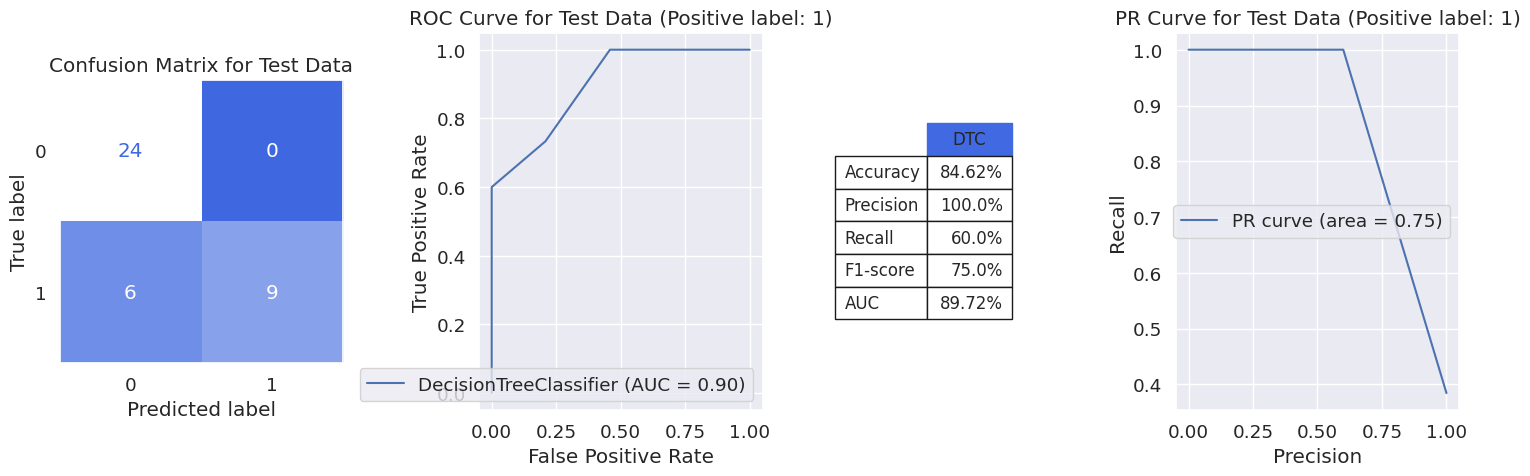

In [94]:
evaluate_clf(DTC, X_train, X_test, y_train, y_test, 'DTC')

In [96]:
dt_predict_proba = DTC.predict_proba(X_test)

In [97]:
dt_y_pred_train = DTC.predict(X_train)
dt_y_pred_test = DTC.predict(X_test)

In [98]:
# Функция оценки качества классификатора
def evaluate_clf(y_train, y_test, y_pred_train, y_pred_test):
    accuracy_train = round(np.mean(y_train.values.ravel() == y_pred_train), 4)
    precision_train = round(precision_score(y_train, y_pred_train, average='macro'), 4)
    recall_train = round(recall_score(y_train, y_pred_train, average='macro'), 4)
    confusion_matrix_train = confusion_matrix(y_train, y_pred_train)

    accuracy_test = round(np.mean(y_test.values.ravel() == y_pred_test), 4)
    precision_test = round(precision_score(y_test, y_pred_test, average='macro'), 4)
    recall_test = round(recall_score(y_test, y_pred_test, average='macro'), 4)
    confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

    print(f'TRAIN set: accuracy {accuracy_train}, precision {precision_train}, recall {recall_train} (макроусреднение)')
    print('Confusion matrix: \n', confusion_matrix_train)
    print(f'TEST set: accuracy {accuracy_test}, precision {precision_test}, recall {recall_test} (макроусреднение)')
    print('Confusion matrix: \n', confusion_matrix_test)

In [101]:
evaluate_clf(y_train, y_test, dt_y_pred_train, dt_y_pred_test)

TRAIN set: accuracy 0.8627, precision 0.8773, recall 0.8368 (макроусреднение)
Confusion matrix: 
 [[89  4]
 [17 43]]
TEST set: accuracy 0.8462, precision 0.9, recall 0.8 (макроусреднение)
Confusion matrix: 
 [[24  0]
 [ 6  9]]


In [138]:
y = label_binarize(y_test.apply(lambda x: x+1), classes=[1, 2,3])
y = y[:,[0,1]]
n_classes = y.shape[1]

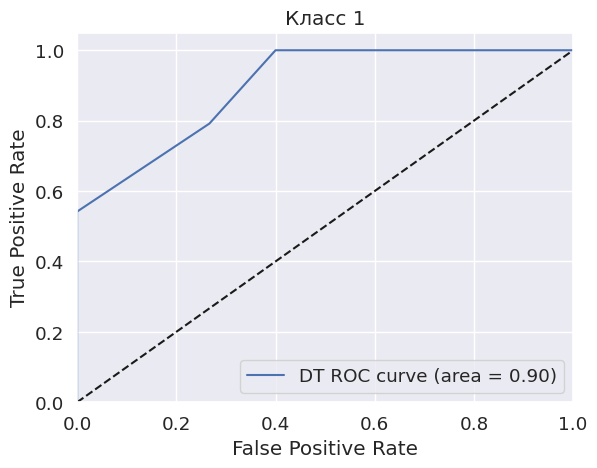

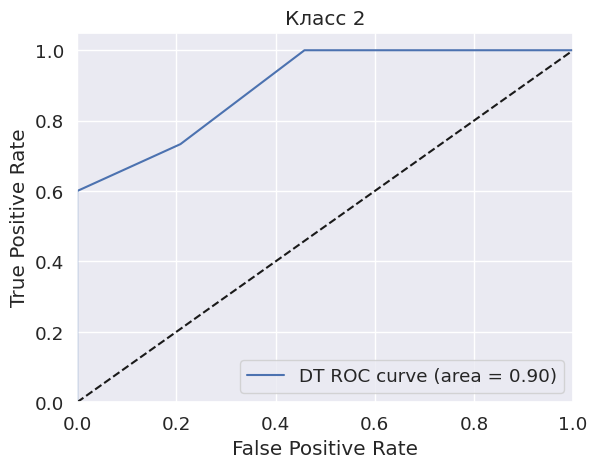

In [139]:
# Compute ROC curve and ROC area for each class
dt_fpr = dict()
dt_tpr = dict()
dt_roc_auc = dict()
for i in range(n_classes):
    dt_fpr[i], dt_tpr[i], _ = roc_curve(y[:, i], dt_predict_proba[:, i])
    dt_roc_auc[i] = auc(dt_fpr[i], dt_tpr[i])


# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(dt_fpr[i], dt_tpr[i], label='DT ROC curve (area = %0.2f)' % dt_roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Класс %i' %(i+1))
    plt.legend(loc="lower right")
    plt.show()

In [141]:
# Compute micro-average ROC curve and ROC area
dt_fpr["micro"], dt_tpr["micro"], _ = roc_curve(y.ravel(), dt_predict_proba.ravel())
dt_roc_auc["micro"] = auc(dt_fpr["micro"], dt_tpr["micro"])

In [142]:
from itertools import cycle
lw = 2

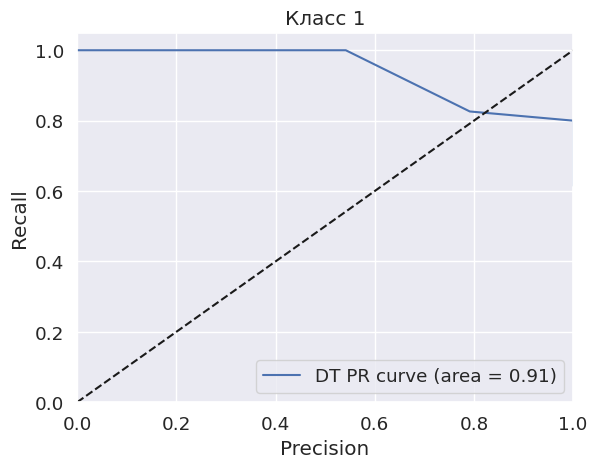

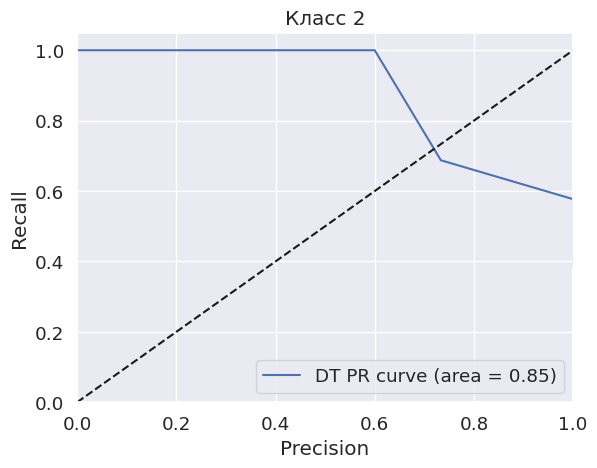

In [144]:
# Compute PR curve and PR area for each class
dt_recall = dict()
dt_precision = dict()
dt_pr_aps = dict()
for i in range(n_classes):
    dt_precision[i], dt_recall[i], _ = precision_recall_curve(y[:, i], dt_predict_proba[:, i])
    dt_pr_aps[i] = average_precision_score(y[:, i], dt_predict_proba[:, i])


# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(dt_recall[i], dt_precision[i], label='DT PR curve (area = %0.2f)' % dt_pr_aps[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Класс %i' %(i+1))
    plt.legend(loc="lower right")
    plt.show()

In [145]:
# Compute micro-average PR curve and PR area
dt_precision["micro"], dt_recall["micro"], _ = precision_recall_curve(y.ravel(), dt_predict_proba.ravel())
dt_pr_aps["micro"] = average_precision_score(y.ravel(), dt_predict_proba.ravel(), average='micro')

In [147]:
def ROC_PR_curve_family_plot(x_dict, y_dict, area_dict, type_curve, y_bit_test, predict_proba, classifier):
    lw = 2
    count_classes = y_bit_test.shape[1]
    # First aggregate all x rates
    all_x = np.unique(np.concatenate([x_dict[i] for i in range(count_classes)]))

    # Then interpolate all ROC curves at this points
    mean_y = np.zeros_like(all_x)
    for i in range(count_classes):
        mean_y += np.interp(all_x, x_dict[i], y_dict[i])

    # Finally average it and compute AUC
    mean_y /= count_classes

    x_dict["macro"] = all_x
    y_dict["macro"] = mean_y
    if type_curve == 'PR':
        area_dict["macro"] = average_precision_score(y_bit_test.ravel(), predict_proba.ravel(), average='macro')
    else:
        if type_curve == 'ROC':
            area_dict["macro"] = auc(x_dict["macro"], y_dict["macro"])
        else:
            print("ERROR")
            return

    # Plot all ROC or PR curves
    plt.figure(figsize=(20, 15))
    plt.plot(
        x_dict["micro"],
        y_dict["micro"],
        label="micro-average {0} curve (area = {1:0.2f})".format(type_curve, area_dict["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        x_dict["macro"],
        y_dict["macro"],
        label="macro-average {0} curve (area = {1:0.2f})".format(type_curve, area_dict["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue", "red", "green", "grey"])
    for i, color in zip(range(count_classes), colors):
        plt.plot(
            x_dict[i],
            y_dict[i],
            color=color,
            lw=lw,
            label="{0} curve of class {1} (area = {2:0.2f})".format(type_curve, i, area_dict[i]),
        )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    if type_curve == 'ROC':
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
    else:
        if type_curve == 'PR':
            plt.xlabel("Recall")
            plt.ylabel("Precision")
        else:
            print("ERROR")
            return
    plt.title("Some extension of Receiver operating characteristic to multiclass {0} classifier".format(classifier))
    plt.legend(loc="lower right")
    plt.show()

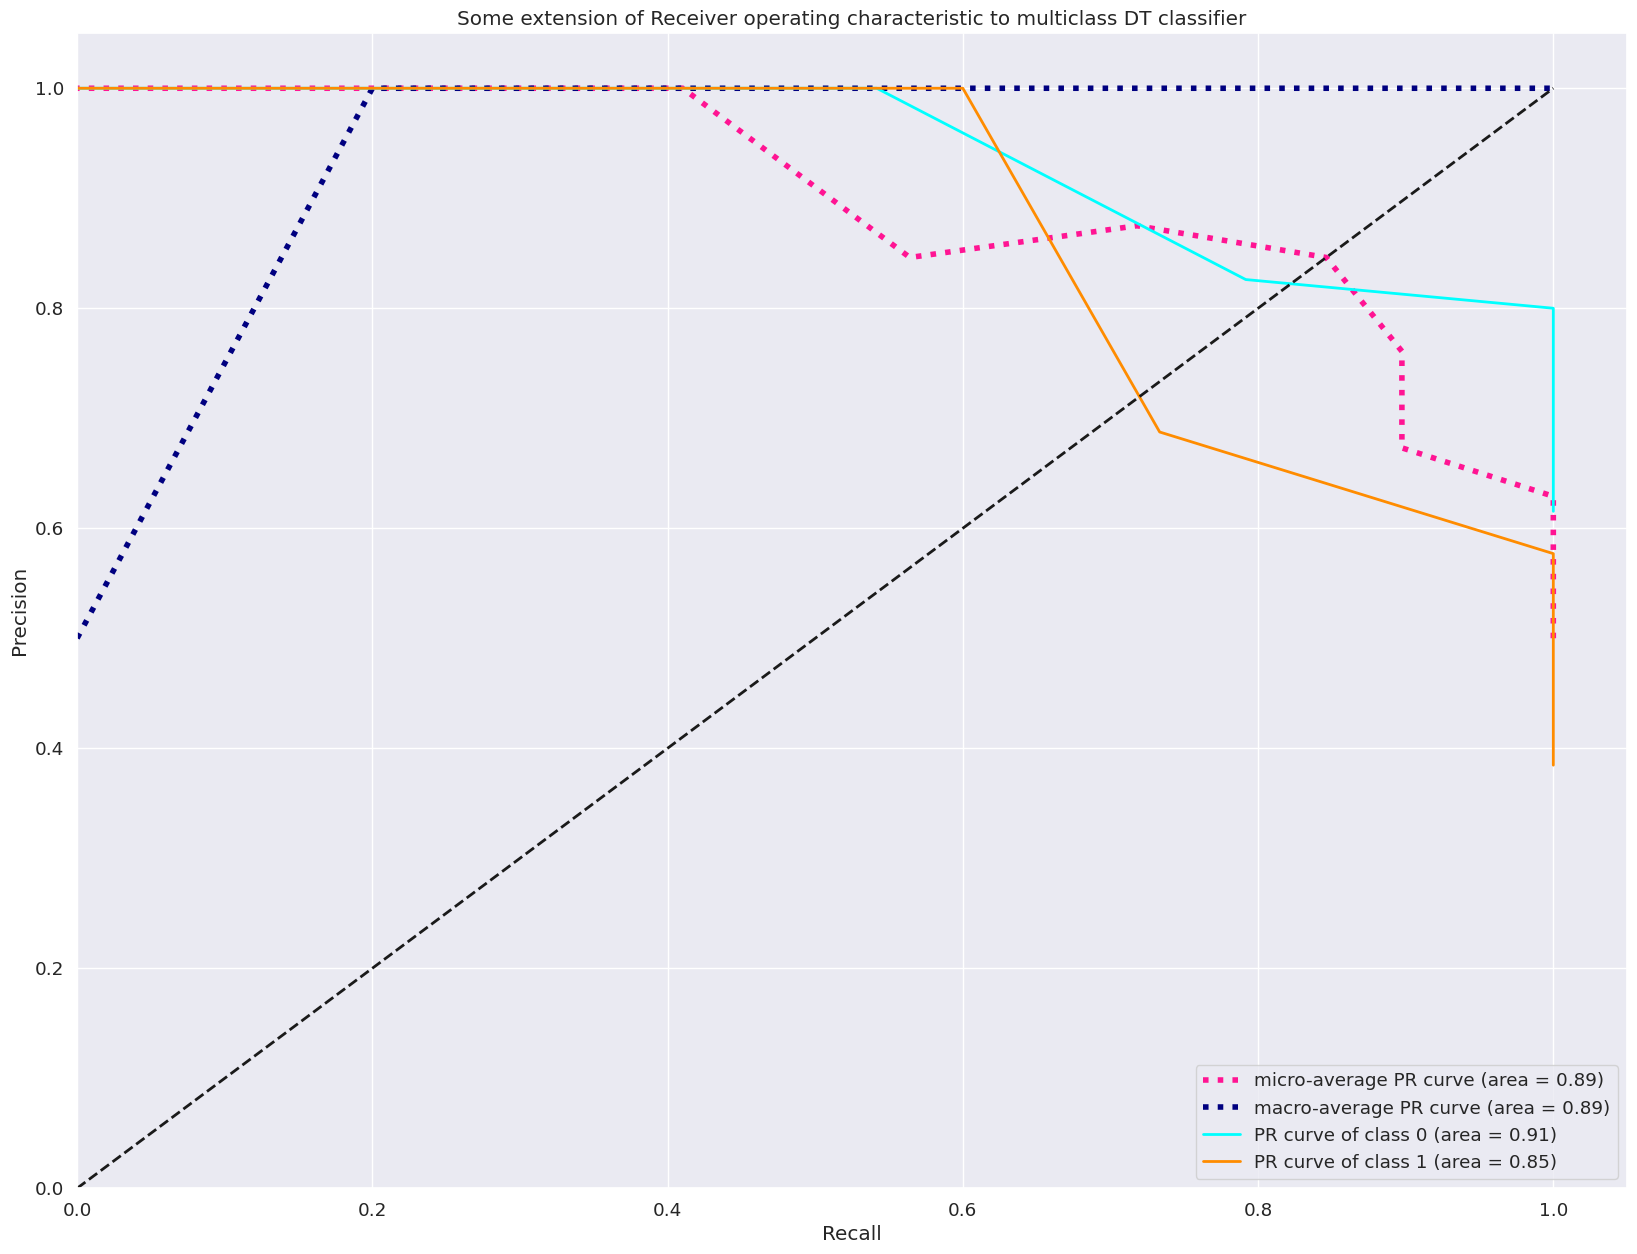

In [148]:
ROC_PR_curve_family_plot(dt_recall, dt_precision, dt_pr_aps, 'PR', y, dt_predict_proba, 'DT')

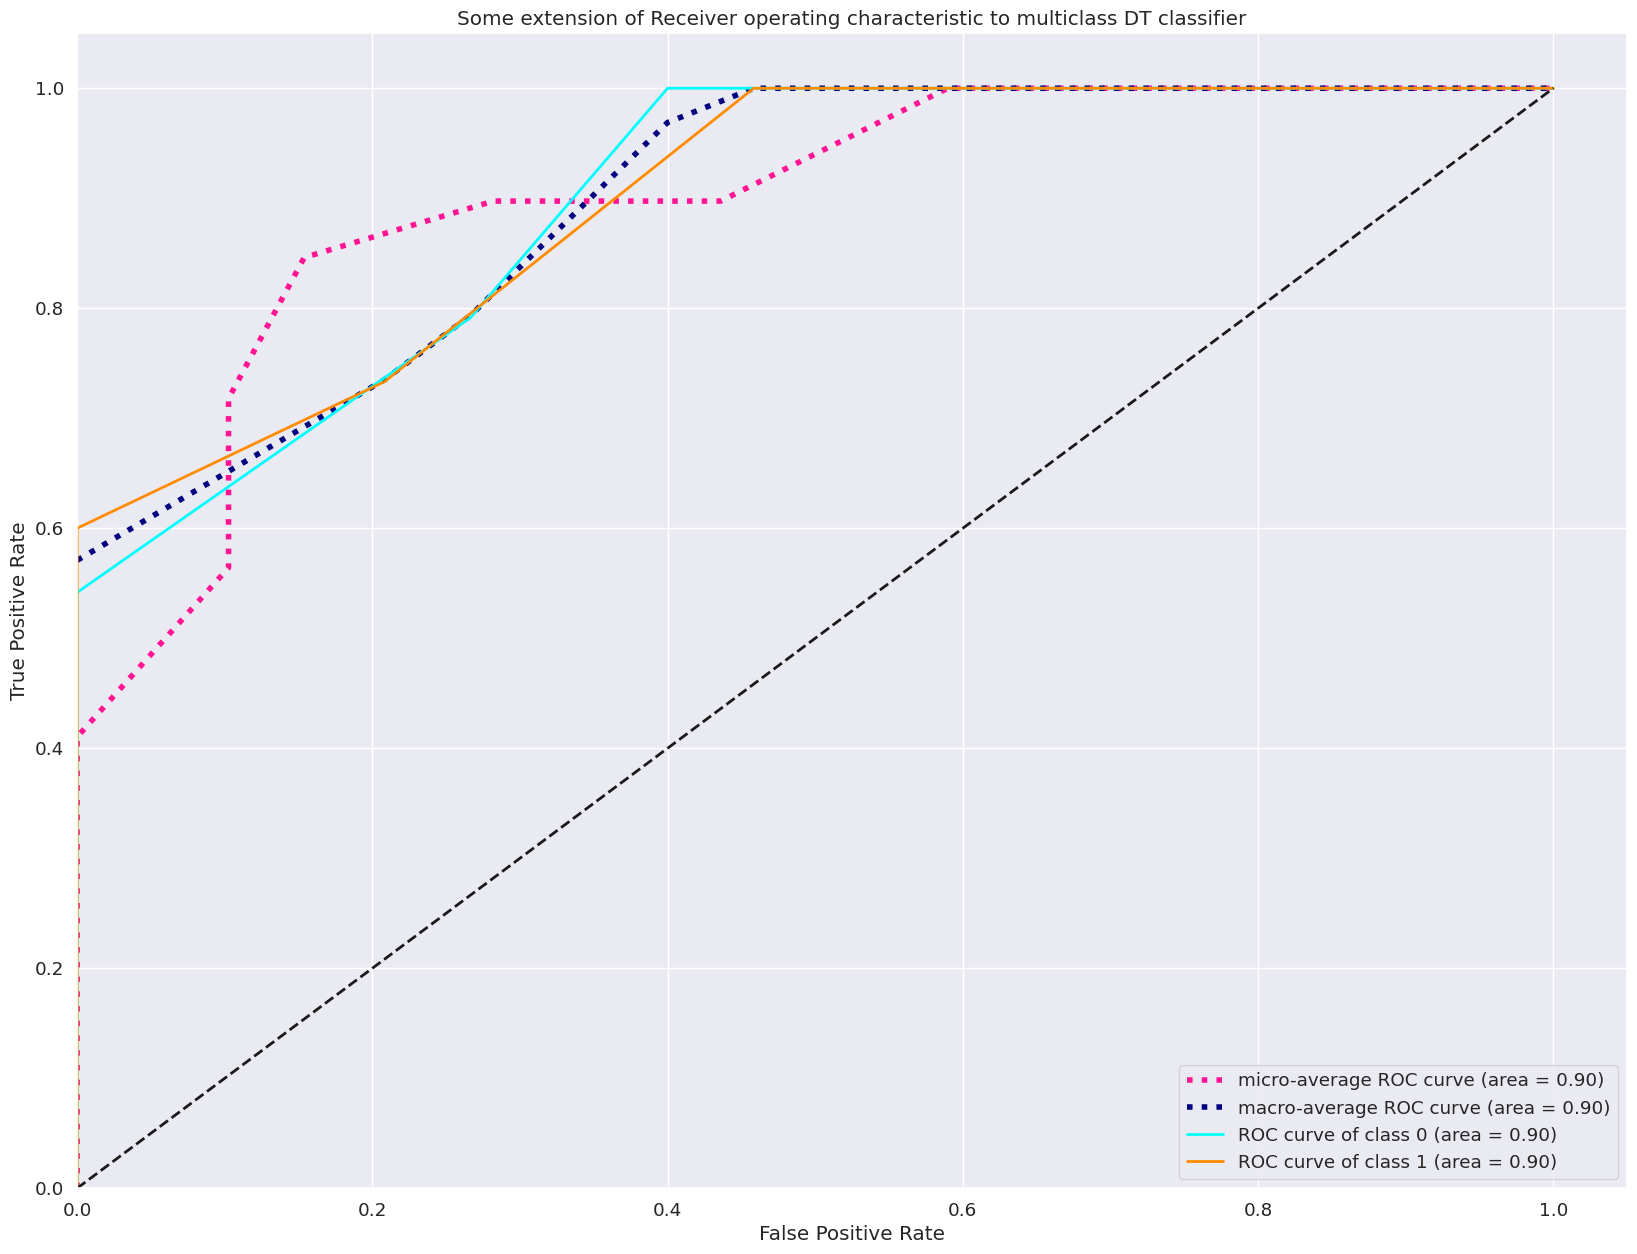

In [149]:
ROC_PR_curve_family_plot(dt_fpr, dt_tpr, dt_roc_auc, 'ROC', y, dt_predict_proba, 'DT')